In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=sns.load_dataset("iris")

In [55]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["species"]=le.fit_transform(data["species"])

In [58]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [59]:
x=data.drop("species",axis=1)
y=data["species"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=40)

<Axes: >

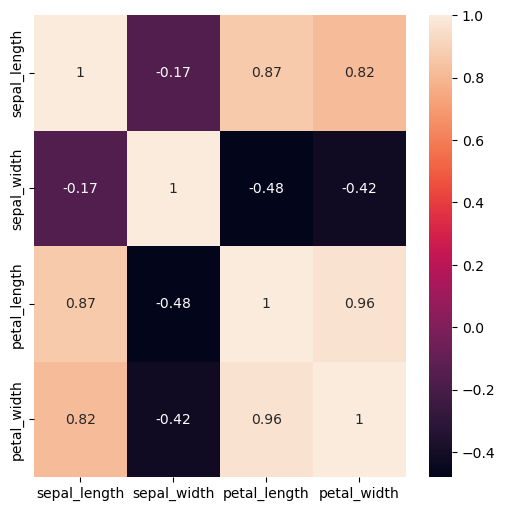

In [60]:
plt.figure(figsize=(6,6))
sns.heatmap(xtrain.corr(),annot=True)

In [61]:
xtrain.corr().columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [67]:
def correlations(dataset,threshold):
    col=set()
    matrix=dataset.corr()
    for i in range(len(matrix.columns)):
        for j in range(i):
            if(matrix.iloc[i,j]>threshold):
                col_na=matrix.columns[i]
                col.add(col_na)
    return col
feat=correlations(xtrain,0.9)    

In [68]:
feat

{'petal_width'}

In [69]:
xtrain.drop(feat,axis=1)

,sepal_length,sepal_width,petal_length
62,6.0,2.2,4.0
23,5.1,3.3,1.7
26,5.0,3.4,1.6
48,5.3,3.7,1.5
2,4.7,3.2,1.3
...,...,...,...
71,6.1,2.8,4.0
12,4.8,3.0,1.4
50,7.0,3.2,4.7
7,5.0,3.4,1.5
